In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn import decomposition
from sklearn.decomposition import PCA

import itertools

import scipy

import scikitplot as skplt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Load data
data = pd.read_csv("jewelry_customers.csv")
data.head()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [3]:
data.describe()

,Age,Income,SpendingScore,Savings
count,505.000000,505.000000,505.000000,505.000000
mean,59.019802,75513.291089,0.505083,11862.455867
std,24.140043,35992.922184,0.259634,4949.229253
min,17.000000,12000.000000,0.000000,0.000000
25%,34.000000,34529.000000,0.304792,6828.709702
50%,59.000000,75078.000000,0.368215,14209.932800
75%,85.000000,107100.000000,0.768279,16047.268330
max,97.000000,142000.000000,1.000000,20000.000000


# Exploratory Data Analysis (EDA)

### Customer age distribution

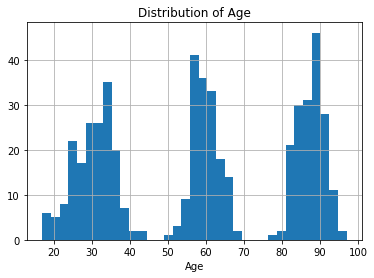

In [4]:
data.hist('Age', bins=35);
plt.title('Distribution of Age');
plt.xlabel('Age');

### Customer income distribution

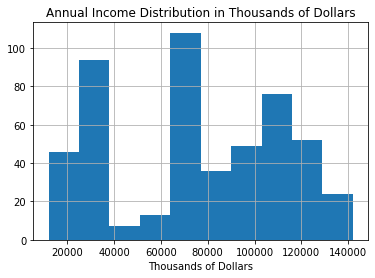

In [5]:
data.hist('Income');
plt.title('Annual Income Distribution in Thousands of Dollars');
plt.xlabel('Thousands of Dollars');

### Customer age vs income distribution

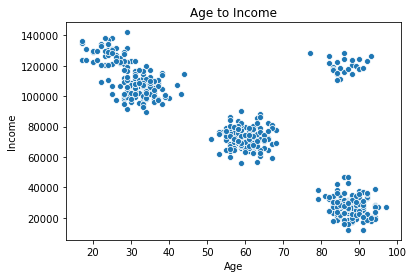

In [6]:
sns.scatterplot('Age', 'Income', data=data);
plt.title('Age to Income');

### Customer age vs savings distribution

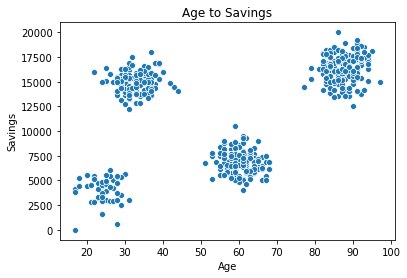

In [7]:
sns.scatterplot('Age', 'Savings', data=data);
plt.title('Age to Savings');

### Customer income vs spending score distribution

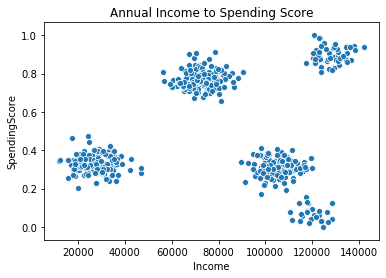

In [8]:
sns.scatterplot('Income', 'SpendingScore', data=data);
plt.title('Annual Income to Spending Score');

### Correlation between all features

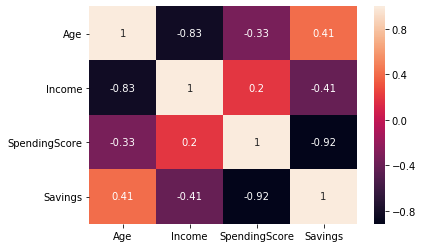

In [9]:
sns.heatmap(data.corr(), annot=True)

## Data Scaling

In [10]:
# Data Scaling
X = data.copy()

scaler = StandardScaler()
features = ['Age','Income','SpendingScore','Savings']
X[features] = scaler.fit_transform(X[features])

In [11]:
# Create a PCA instance to better visualize the clusters
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.63815124, 0.30236345])

In [12]:
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

# K-Means Clustering

### Experimentation with different clusters

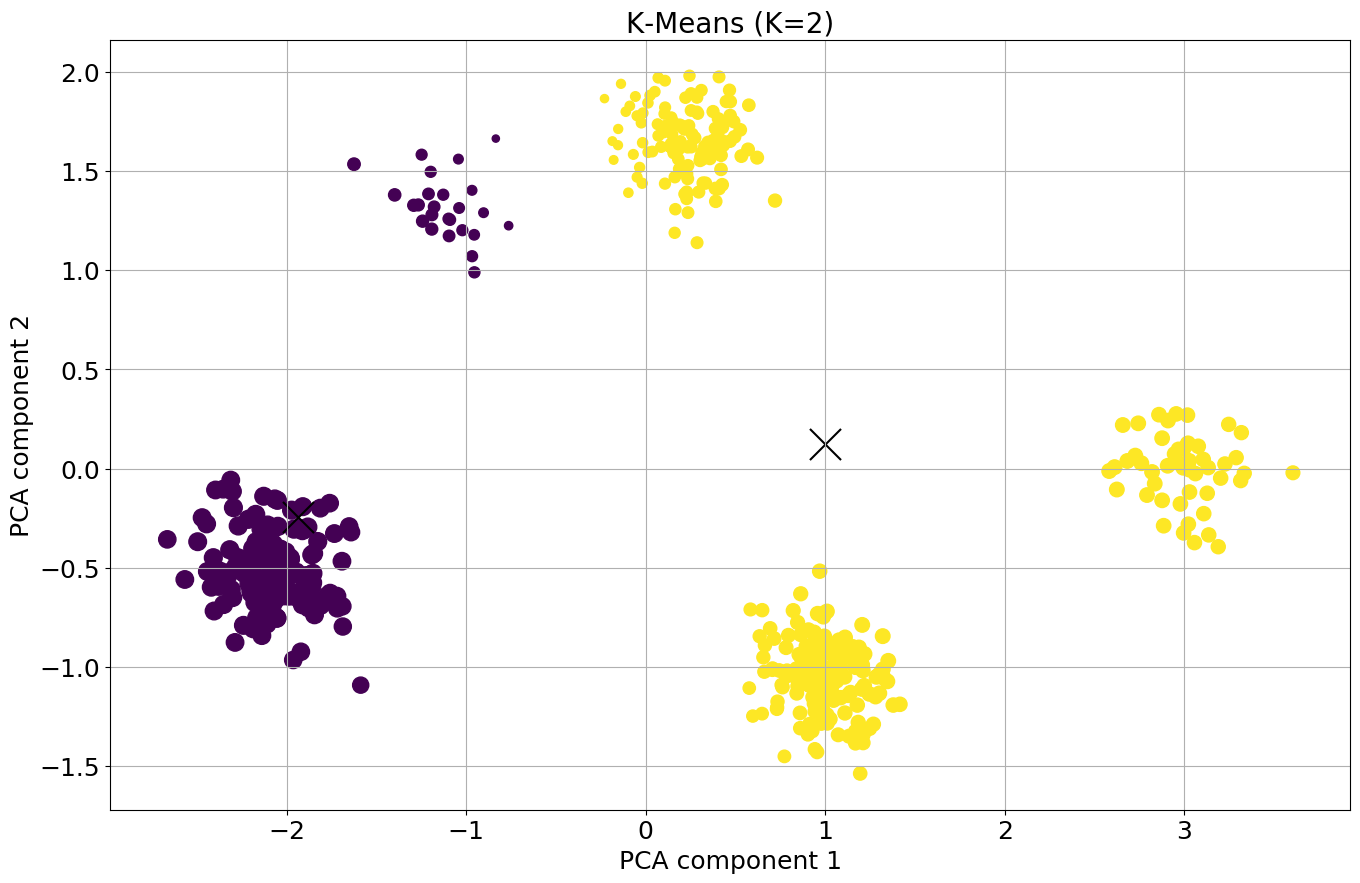

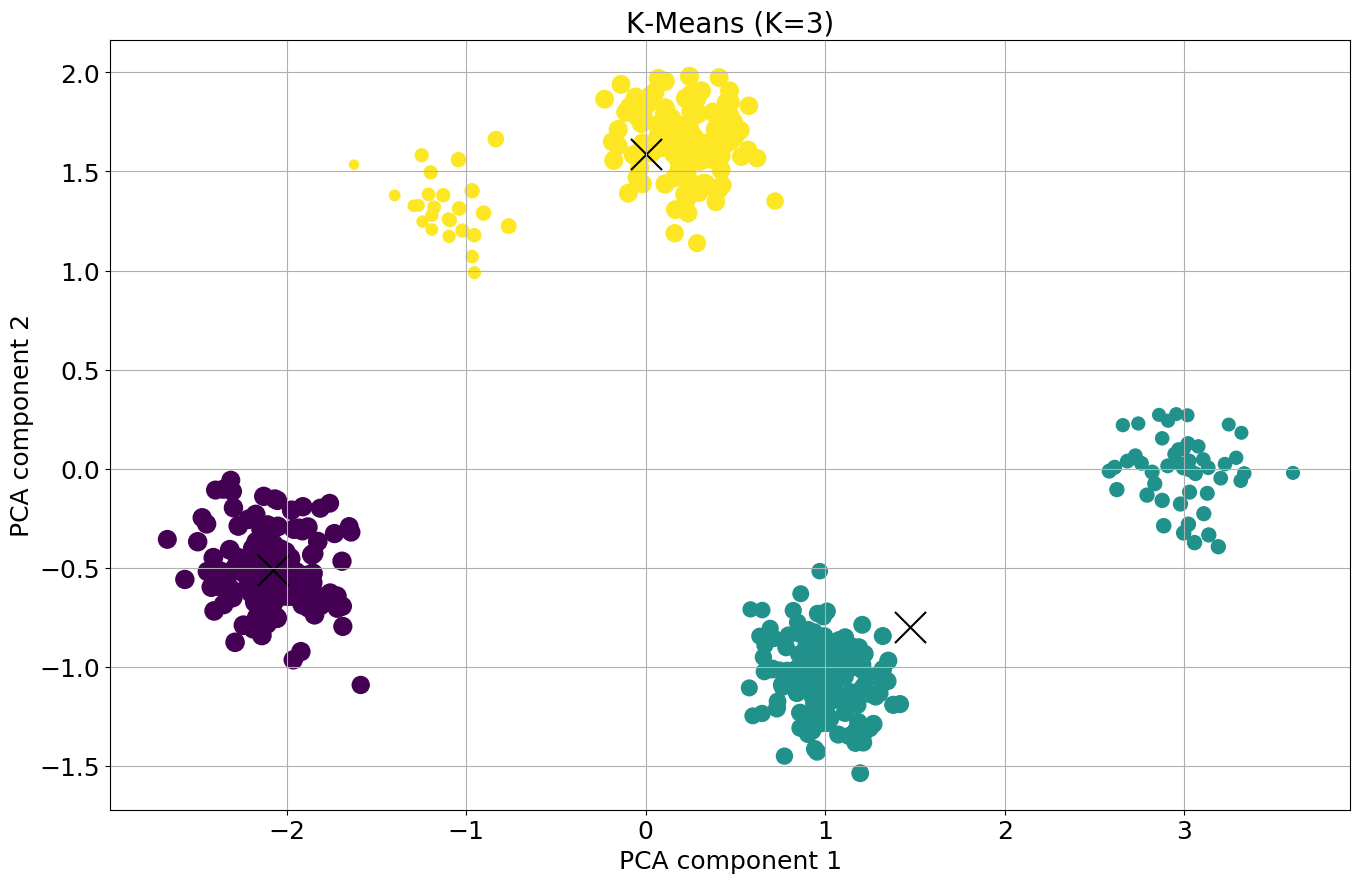

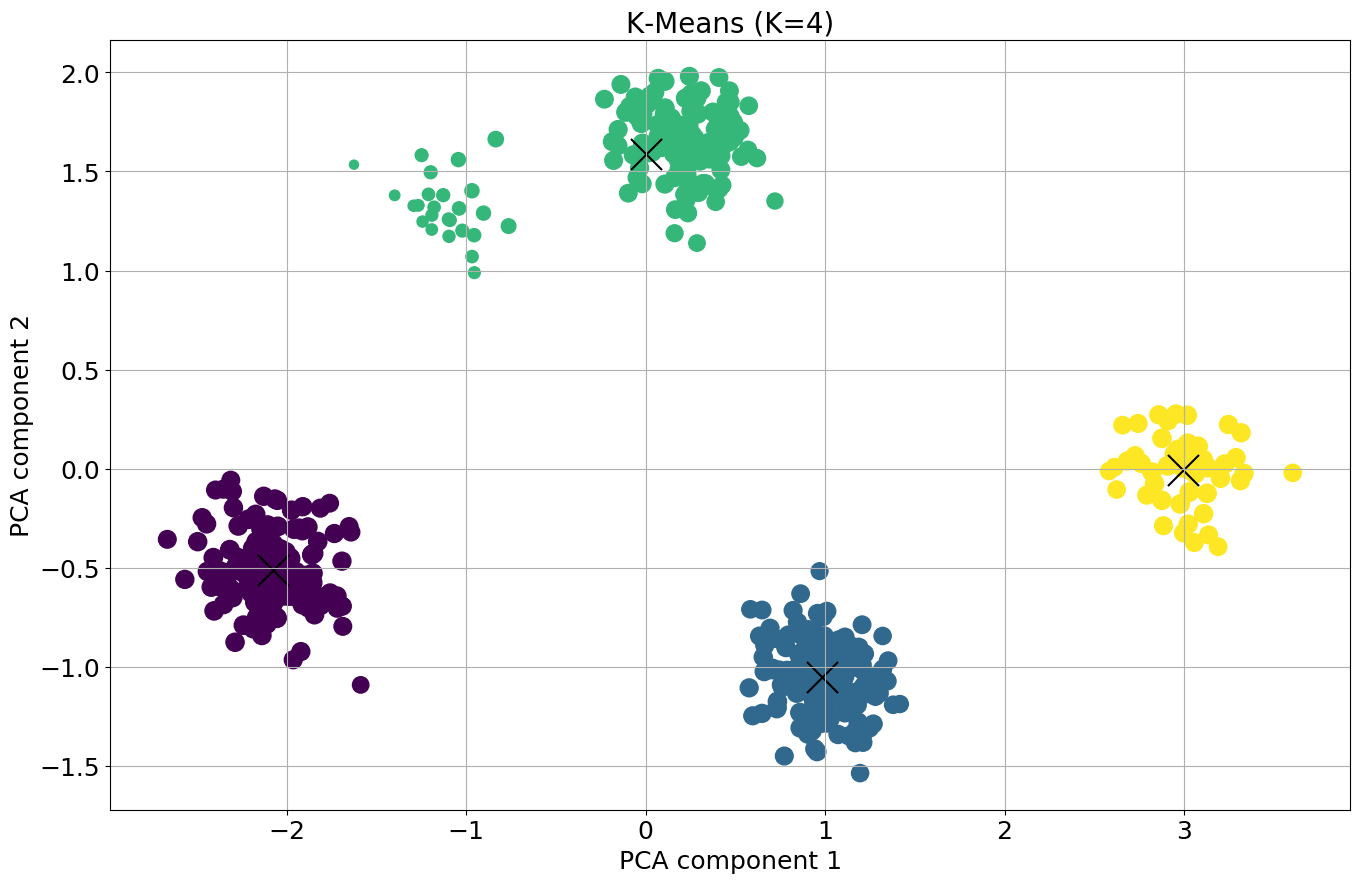

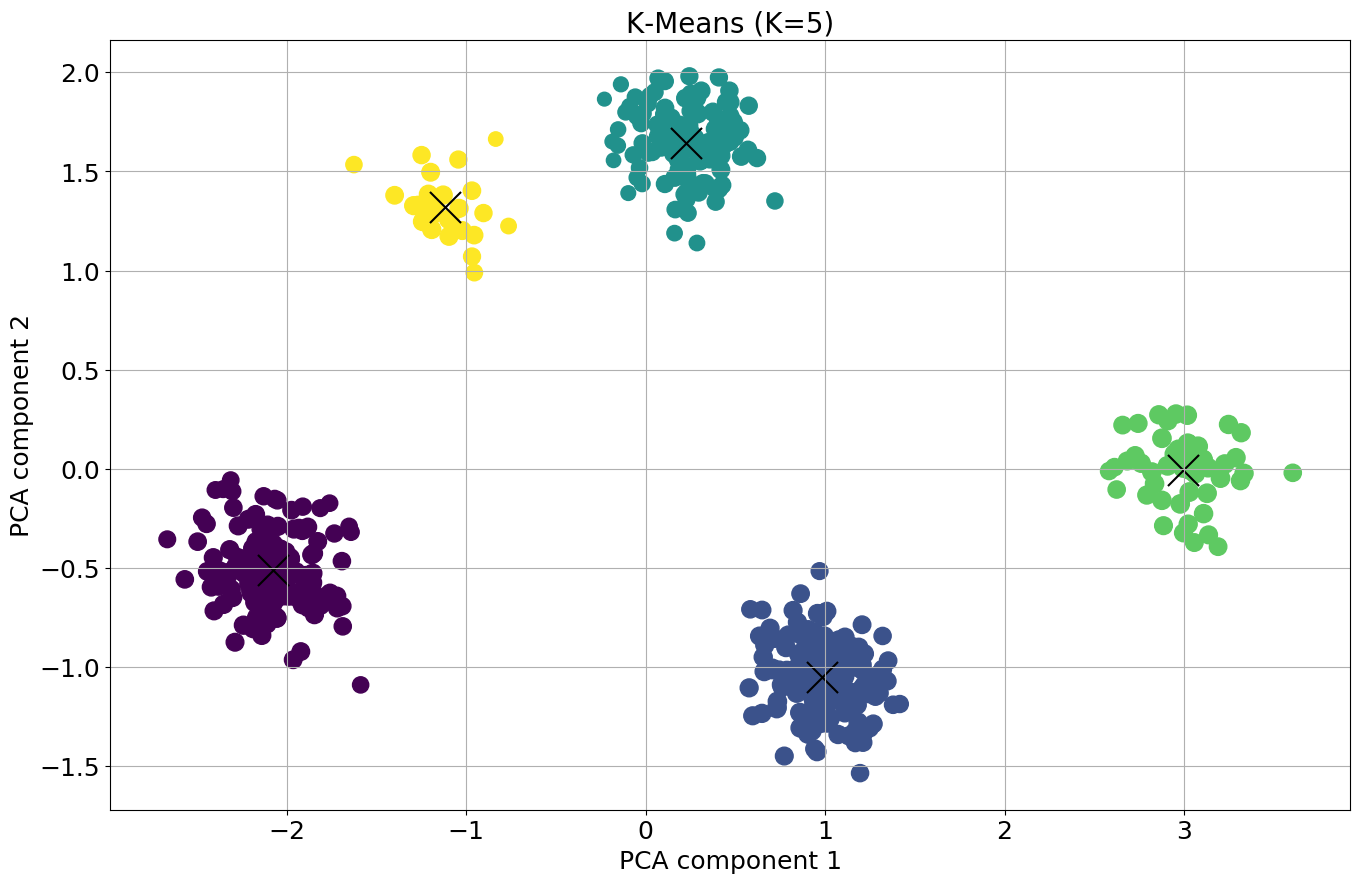

c:\users\keert\appdata\local\programs\python\python37\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


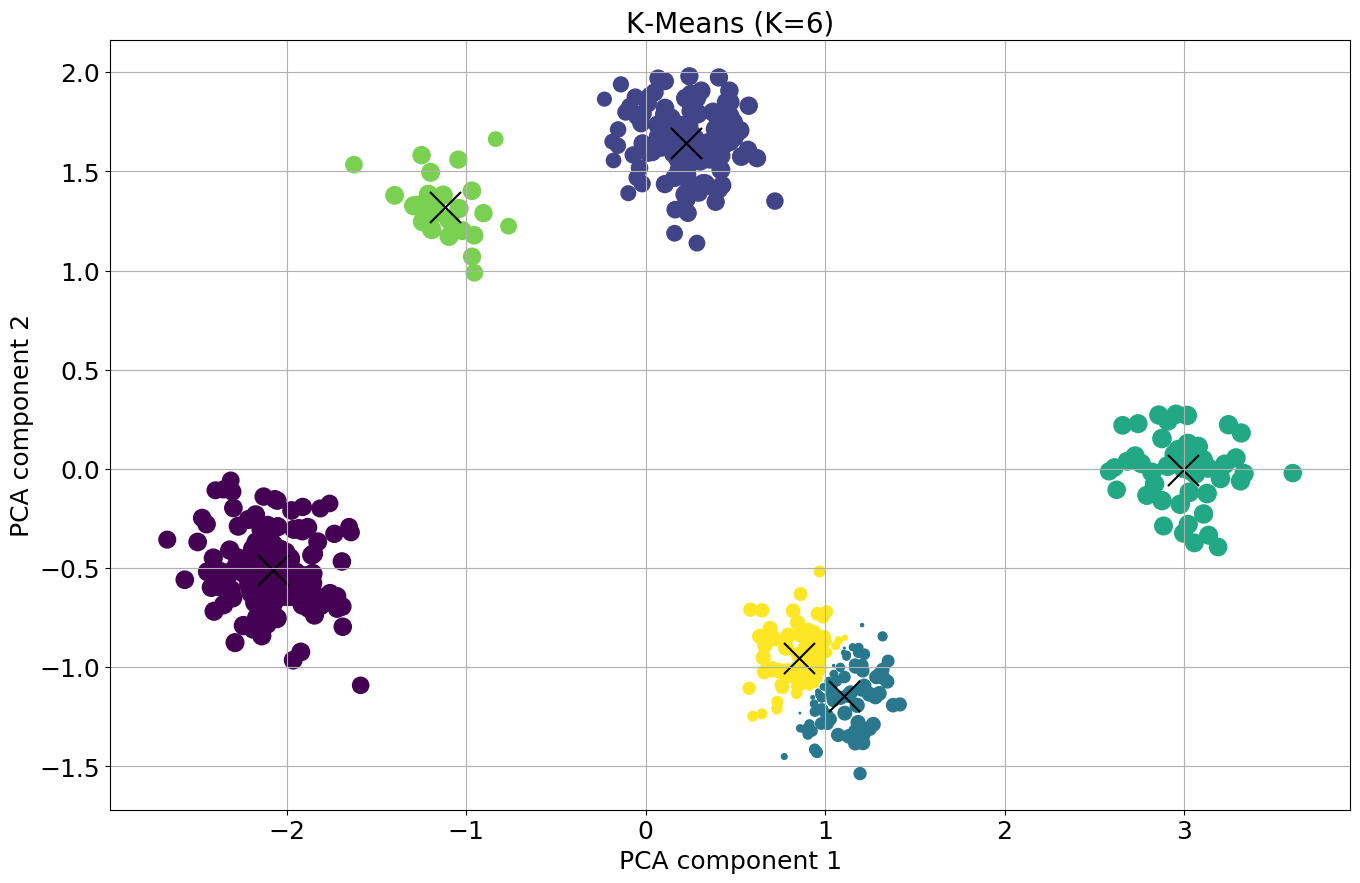

c:\users\keert\appdata\local\programs\python\python37\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


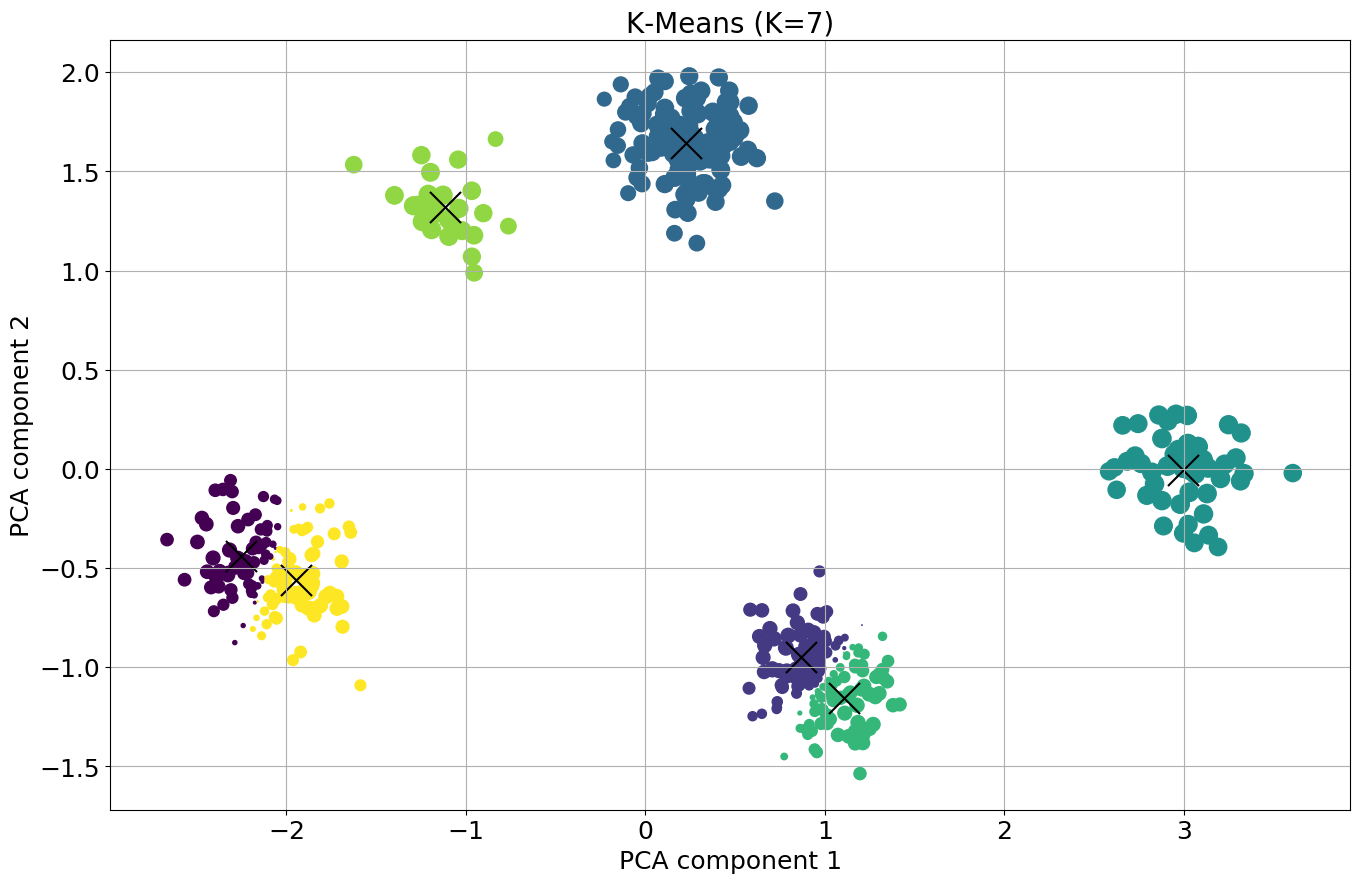

In [13]:
# Experimenting with different k values
def do_kmeans(PCA_components, k):
    #k_means = KMeans(init='k-means++', n_clusters=k, n_init=10, random_state=42)
   # k_means.fit(X)
   #wcss = k_means.inertia_
   # sil = silhouette_score(X, k_means.labels_)
    
    #K-means clustering
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10, random_state=42)
    k_means.fit(PCA_components.iloc[:,:3])
    #wcss = k_means.inertia_
    #sil = silhouette_score(X, k_means.labels_)
    
    plt.style.use('default');

    sample_silhouette_values = silhouette_samples(PCA_components.iloc[:,:3], k_means.labels_)
    sizes = 200*sample_silhouette_values

    plt.figure(figsize=(16, 10));
    plt.grid(True);

    plt.scatter(PCA_components.iloc[:, 0], PCA_components.iloc[:, 1], s=sizes, c=k_means.labels_)
    plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', s=500, c="black")

    plt.title("K-Means (K={})".format(k), fontsize=20);
    plt.xlabel('PCA component 1', fontsize=18);
    plt.ylabel('PCA component 2', fontsize=18);
    plt.xticks(fontsize=18);
    plt.yticks(fontsize=18);
    plt.show()
    
    #print("K={}, WCSS={:.2f}, Sil={:.2f}".format(k, wcss, sil))

for k in range(2, 8):
    do_kmeans(PCA_components, k)

### Elbow method

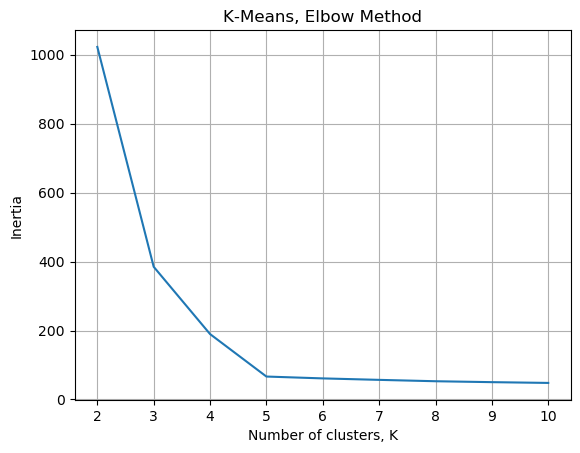

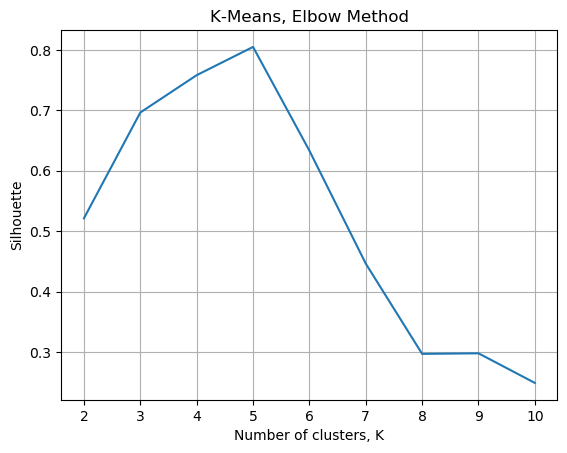

In [14]:
#Elbow Method
inertias = {}
silhouettes = {}
for k in range(2, 11):
    kmeans = KMeans(init='k-means++', n_init=10, n_clusters=k, max_iter=1000, random_state=42).fit(X)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(X, kmeans.labels_, metric='euclidean')
    

plt.figure();
plt.grid(True);
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");


plt.figure();
plt.grid(True);
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

<Figure size 1600x1000 with 0 Axes>

Text(0.5, 1.0, 'K-Means (K=5)')

Text(0.5, 0, 'PCA component 1')

Text(0, 0.5, 'PCA component 2')

(array([-3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 <a list of 8 Text xticklabel objects>)

(array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5]),
 <a list of 10 Text yticklabel objects>)

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-1.1160592552556439, 1.3218590135274653, '4')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-1.1160592552556439, 1.3218590135274653, '4')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-1.1160592552556439, 1.3218590135274653, '4')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-1.1160592552556439, 1.3218590135274653, '4')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-1.1160592552556439, 1.3218590135274653, '4')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(-1.1160592552556439, 1.3218590135274653, '4')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-1.1160592552556439, 1.3218590135274653, '4')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-1.1160592552556439, 1.3218590135274653, '4')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-1.1160592552556439, 1.3218590135274653, '4')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-1.1160592552556439, 1.3218590135274653, '4')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-1.1160592552556439, 1.3218590135274653, '4')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-1.1160592552556439, 1.3218590135274653, '4')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-1.1160592552556439, 1.3218590135274653, '4')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-1.1160592552556439, 1.3218590135274653, '4')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-1.1160592552556439, 1.3218590135274653, '4')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-1.1160592552556439, 1.3218590135274653, '4')

Text(-1.1160592552556439, 1.3218590135274653, '4')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-1.1160592552556439, 1.3218590135274653, '4')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-1.1160592552556439, 1.3218590135274653, '4')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-1.1160592552556439, 1.3218590135274653, '4')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-1.1160592552556439, 1.3218590135274653, '4')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-1.1160592552556439, 1.3218590135274653, '4')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-1.1160592552556439, 1.3218590135274653, '4')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-1.1160592552556439, 1.3218590135274653, '4')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-1.1160592552556439, 1.3218590135274653, '4')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.9849141264154957, -1.049486822846276, '1')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(2.9939531360419793, -0.004609317255071012, '3')

Text(0.2262120629259221, 1.6432941818684206, '2')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

Text(-2.0743565523578718, -0.5108955456053653, '0')

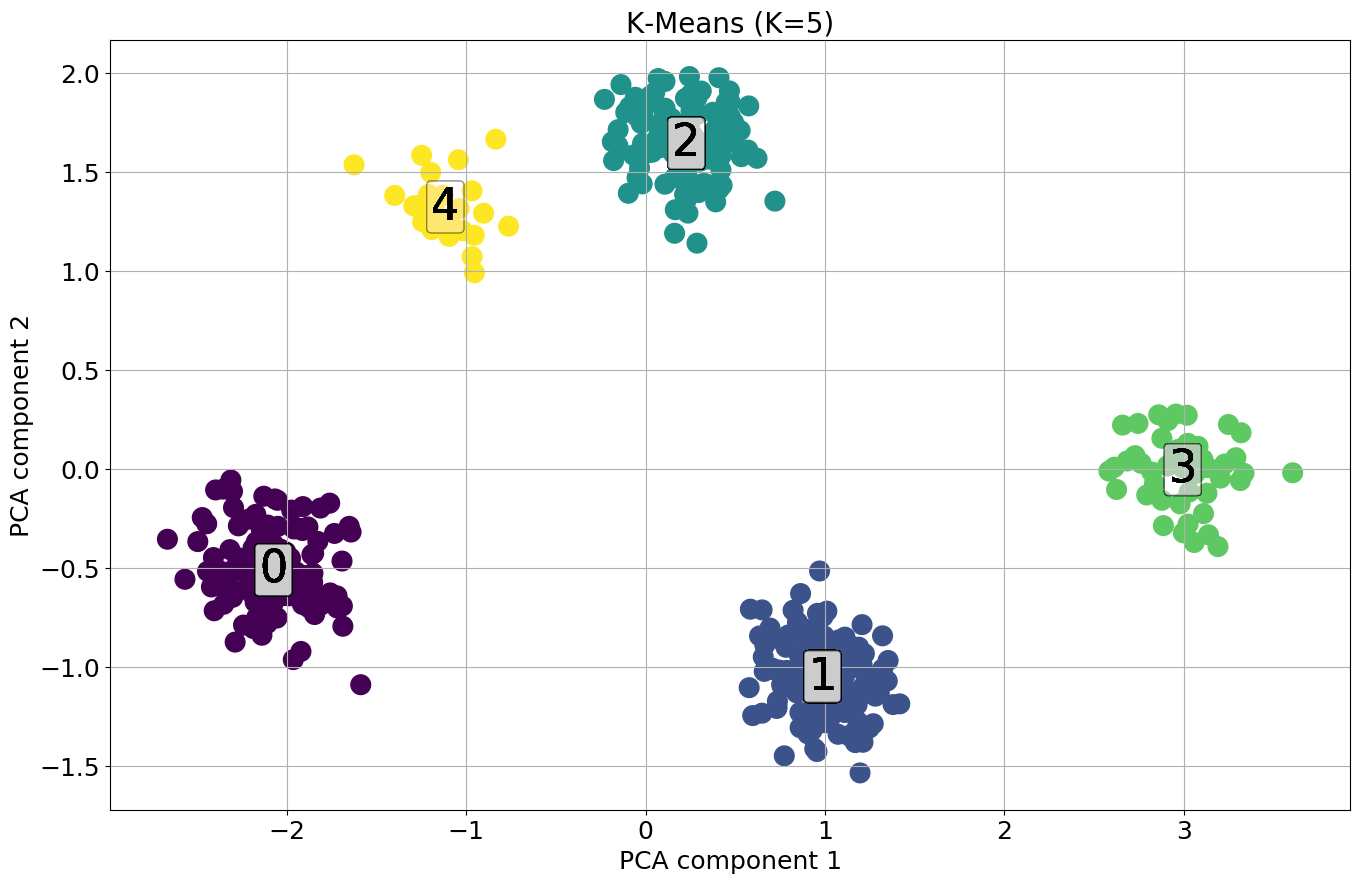

In [15]:
# Plot K-means clusters using top two PCA components
k_means = KMeans(n_clusters=5, random_state=42)
k_means.fit(PCA_components.iloc[:,:3])

plt.style.use('default');

plt.figure(figsize=(16, 10));
plt.grid(True);

sc = plt.scatter(PCA_components.iloc[:, 0], PCA_components.iloc[:, 1], s=200, c=k_means.labels_);
plt.title("K-Means (K=5)", fontsize=20);
plt.xlabel('PCA component 1', fontsize=18);
plt.ylabel('PCA component 2', fontsize=18);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);

for label in k_means.labels_:
    plt.text(x=k_means.cluster_centers_[label, 0], y=k_means.cluster_centers_[label, 1], s=label, fontsize=32,
                       horizontalalignment='center', verticalalignment='center', color='black',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1', alpha=0.02));

### Silhouette graph

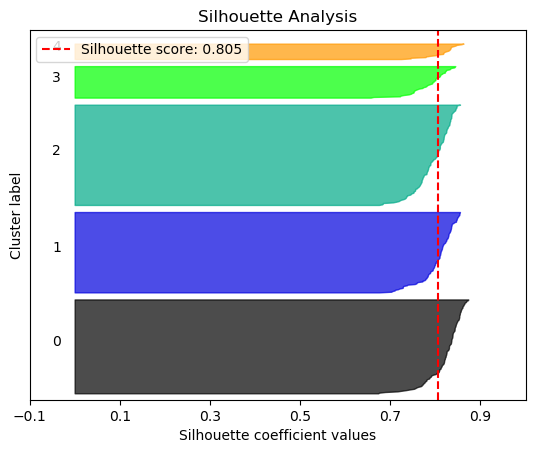

In [16]:
# Plot silhouette graph using top two PCA components
cluster_labels = k_means.fit_predict(X);
skplt.metrics.plot_silhouette(X, cluster_labels);

### Relative importance plot

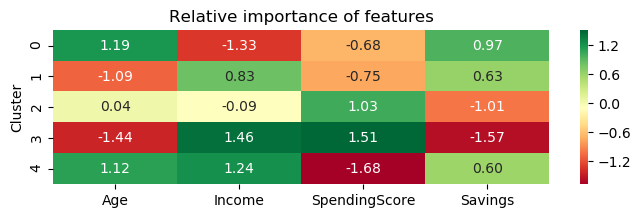

In [17]:
# Relative importance plot
# Red features have negative importance while green indicates positive importance in that particular cluster
dat = X.copy()

dat['Cluster'] = k_means.labels_

cluster_avg = dat.groupby(['Cluster']).mean()
population_avg = dat.drop(['Cluster'], axis=1).mean()

relative_imp = cluster_avg - population_avg

plt.figure(figsize=(8, 2));
plt.title('Relative importance of features');
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn');